In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
# Transformation from color to gray scale image
def rgb2gray(rgb_image):
    return np.dot(rgb_image[...,:3], [0.299, 0.587, 0.114])

def view_img(gray_scale:bool):
  # create figure
  fig = plt.figure(figsize=(10, 15))

  if gray_scale == True:
    plt.imshow(gray_img, cmap=plt.get_cmap("gray"))
    plt.title("Gray Scale Image")

  else:
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title("Original RGB Image")

In [3]:
# Compute RGB Histogram and plot it
def Histogram_Computation(Image):
	
	Image_Height = Image.shape[0]
	Image_Width = Image.shape[1]
	Image_Channels = Image.shape[2]
	
	Histogram = np.zeros([256, Image_Channels], np.int32)
	
	for x in range(0, Image_Height):
		for y in range(0, Image_Width):
			for c in range(0, Image_Channels):
				Histogram[Image[x,y,c], c] +=1
	
	return Histogram

def Plot_Histogram(Histogram):
	plt.figure()
	plt.title("Color Image Histogram")
	plt.xlabel("Intensity Level")
	plt.ylabel("Intensity Frequency")
	plt.xlim([0, 256])
	plt.plot(Histogram[:,0],'b') # This is to Plot Blue Channel with Blue Color
	plt.plot(Histogram[:,1],'g') # This is to Plot Green Channel with Green Color
	plt.plot(Histogram[:,2],'r') # This is to Plot Red Channel with Red Color

In [4]:
# Compute the distribution function (cumulative curve)
def cumhist(histogram):
    cumhistogram = []
    cumhistogram.append(histogram[0])
    for i in range(1,256):
        cumhistogram.append(histogram[i] + cumhistogram[i - 1])
    cumhistogram = np.array(cumhistogram)
    nj = (cumhistogram - cumhistogram.min()) * 255
    N = cumhistogram.max() - cumhistogram.min()

    cum_curv = nj/N

    return cum_curv

In [5]:
# Plot R, G and B histograms
def plot_rgb_histograms(color:str):
  red_list, green_list, blue_list = [], [], []
  xlist = range(0, 256)
  
  for i in range(0, 256):
      red_list.append(Histogram[i, 2])
      green_list.append(Histogram[i, 1])
      blue_list.append(Histogram[i, 0])

  plt.xlabel("Intensity Level")
  plt.ylabel("Intensity Frequency")

  if(color=='red'):
    plt.bar(xlist, red_list, color="red")
    plt.title("Red Histogram")
    
  elif(color=='green'):
    plt.bar(xlist, green_list, color="green")
    plt.title("Green Histogram")
  
  elif(color=='blue'):
    plt.bar(xlist, blue_list, color="blue")
    plt.title("Blue Histogram")

In [6]:
# Plot R, G and B cumulative curves
def plot_rgb_cumhist(color:str):
  red_cumhist, green_cumhist, blue_cumhist = [], [], []
  xlist = range(0, 256)
  
  for i in range(0, len(cumhistogram)):
      red_cumhist.append(cumhistogram[i][2])
      green_cumhist.append(cumhistogram[i][1])
      blue_cumhist.append(cumhistogram[i][0])

  if(color=='red'):
    plt.bar(xlist, red_cumhist, color="red")
    plt.title("Red Cumulative Curve")
    
  elif(color=='green'):
    plt.bar(xlist, green_cumhist, color="green")
    plt.title("Green Cumulative Curve")
  
  elif(color=='blue'):
    plt.bar(xlist, blue_cumhist, color="blue")
    plt.title("Blue Cumulative Curve")

  else:
    plt.plot(xlist, red_cumhist, color="red")
    plt.plot(xlist, green_cumhist, color="green")
    plt.plot(xlist, blue_cumhist, color="blue")
    plt.title("Cumulative Curve")

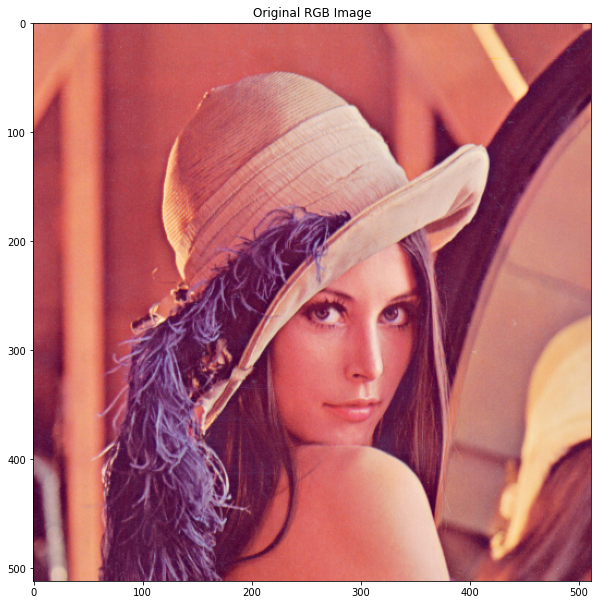

In [7]:
# Read a color image and convert it to gray-scale image
img = cv2.imread("images/Lenna_512.png") #This will read a color Images

gray_img = rgb2gray(img)

view_img(gray_scale=False)

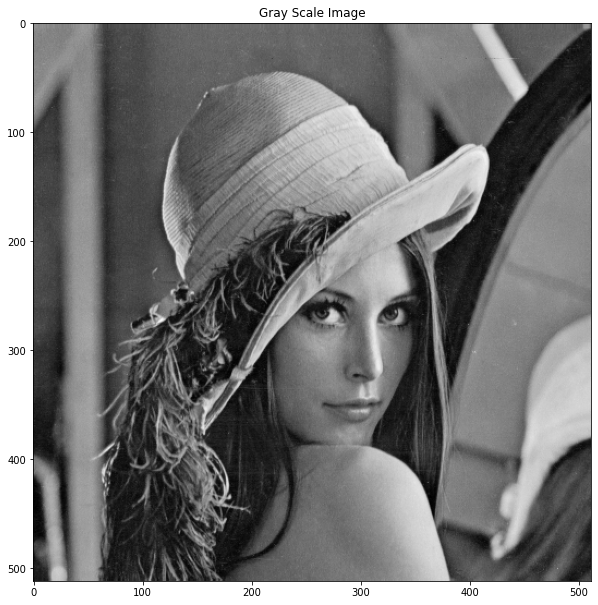

In [8]:
view_img(gray_scale=True)

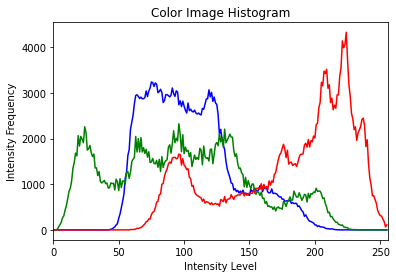

In [9]:
Histogram = Histogram_Computation(img)
    
Plot_Histogram(Histogram)

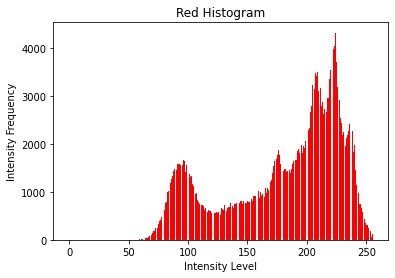

In [10]:
plot_rgb_histograms('red')

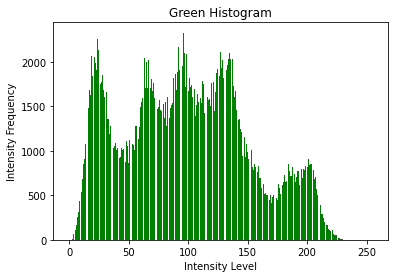

In [11]:
plot_rgb_histograms('green')

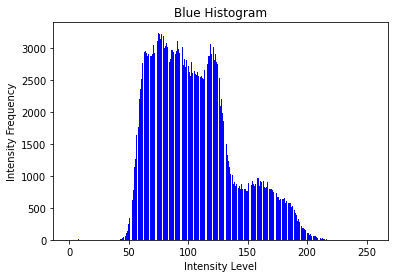

In [12]:
plot_rgb_histograms('blue')

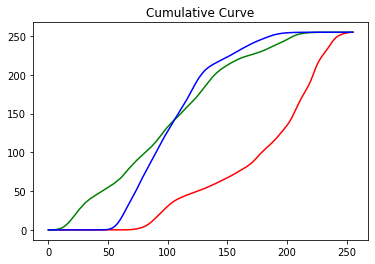

In [13]:
# draw cumulative curve
cumhistogram = cumhist(Histogram)
plot_rgb_cumhist('rgb')

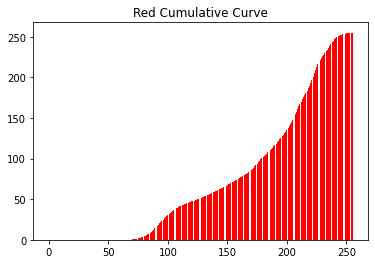

In [14]:
plot_rgb_cumhist('red')

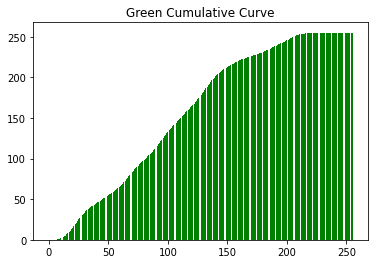

In [15]:
plot_rgb_cumhist('green')

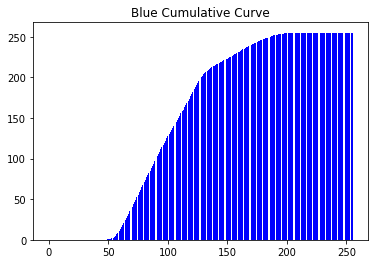

In [16]:
plot_rgb_cumhist('blue')